In [1]:
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# The main path
path = '/home/sky/Desktop/god-classification/dataset/'

# Training directory
train_dir = os.path.join(path,'Train')
print(train_dir)

# Validation directory
val_dir = os.path.join(path,'Val')
print(val_dir)


# Creating image generator steps
train_data = ImageDataGenerator(rescale=1/255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validate_data = ImageDataGenerator(rescale=1/255)

train_generator = train_data.flow_from_directory(directory=train_dir,target_size=(412,412),batch_size=4,class_mode='categorical')
validate_generator = validate_data.flow_from_directory(directory=val_dir,target_size=(412,412),batch_size=2,class_mode='categorical')

2023-02-17 01:45:16.183884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 01:45:16.183905: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/home/sky/Desktop/god-classification/dataset/Train
/home/sky/Desktop/god-classification/dataset/Val
Found 150 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Flatten
from keras.optimizers import Adam
from keras.applications.mobilenet import MobileNet
mn_cnn = MobileNet(input_shape = (412,412,3), dropout = 0.25, weights = None, 
                  classes = 3)

mn_cnn.compile(loss = 'categorical_crossentropy', 
               optimizer = Adam(lr = 1e-4, decay = 1e-6),
               metrics = ['acc'])

loss_history = []
mn_cnn.summary()



2023-02-17 01:45:17.756168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-17 01:45:17.756272: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-17 01:45:17.756347: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sky-Modern-14-A10M): /proc/driver/nvidia/version does not exist
2023-02-17 01:45:17.756729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "mobilenet_1.00_412"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 412, 412, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 206, 206, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 206, 206, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 206, 206, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 206, 206, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 206, 206, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 25, 25, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 25, 25, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 25, 25, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 25, 25, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 25, 25, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 25, 25, 512)       262144    
                                                                 
 conv_pw_9

/home/sky/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [3]:
for i in range(5):
    print("Epoch : ",i+1)
    loss_history += [mn_cnn.fit_generator(train_generator, steps_per_epoch=4,
                         validation_data=validate_generator, validation_steps=2)]


/tmp/ipykernel_11034/1507198391.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss_history += [mn_cnn.fit_generator(train_generator, steps_per_epoch=4,


Epoch :  1
4/4 [==============================] - 7s 1s/step - loss: 1.1429 - acc: 0.5000 - val_loss: 1.0982 - val_acc: 0.2500
Epoch :  2
4/4 [==============================] - 5s 1s/step - loss: 1.3348 - acc: 0.1875 - val_loss: 1.0869 - val_acc: 0.5000
Epoch :  3
4/4 [==============================] - 5s 1s/step - loss: 0.9622 - acc: 0.5625 - val_loss: 1.1058 - val_acc: 0.2500
Epoch :  4
4/4 [==============================] - 5s 1s/step - loss: 0.9957 - acc: 0.3750 - val_loss: 1.1096 - val_acc: 0.2500
Epoch :  5
4/4 [==============================] - 5s 1s/step - loss: 1.1120 - acc: 0.3125 - val_loss: 1.1181 - val_acc: 0.0000e+00


Text(0.5, 1.0, 'Accuracy')

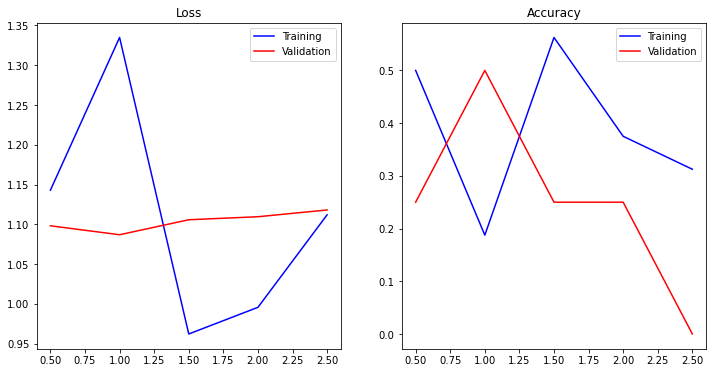

In [4]:
epich = np.cumsum(np.concatenate(
    [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
_ = ax1.plot(epich,
             np.concatenate([mh.history['loss'] for mh in loss_history]),
             'b-',
             epich, np.concatenate(
        [mh.history['val_loss'] for mh in loss_history]), 'r-')
ax1.legend(['Training', 'Validation'])
ax1.set_title('Loss')

_ = ax2.plot(epich, np.concatenate(
    [mh.history['acc'] for mh in loss_history]), 'b-',
                 epich, np.concatenate(
        [mh.history['val_acc'] for mh in loss_history]),
                 'r-')
ax2.legend(['Training', 'Validation'])
ax2.set_title('Accuracy')

In [ ]:
#my_new_model.save("/home/sky/Desktop/god-classification/mobNet_model10.h5")